In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [98]:
dataset = '../data/cleaned_Medicaldataset.csv'
df = pd.read_csv(dataset, header=0)

In [99]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,55,1,64,160,77,270.0,1.99,0.003,negative
2,58,0,61,112,58,87.0,1.83,0.004,negative
3,32,0,40,179,68,102.0,0.71,0.003,negative
4,44,0,60,154,81,135.0,2.35,0.004,negative


In [100]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000
mean,55.595178,0.624365,74.980964,125.668782,71.848985,130.025000,3.114244,0.022284
std,13.736949,0.484594,13.862032,23.514805,13.381464,47.830193,2.151757,0.033046
min,21.000000,0.000000,36.000000,65.000000,38.000000,35.000000,0.321000,0.002000
25%,45.000000,0.000000,63.000000,110.000000,61.000000,96.000000,1.600000,0.005000
50%,56.000000,1.000000,74.000000,124.000000,71.000000,111.000000,2.490000,0.010000
75%,66.000000,1.000000,84.000000,143.000000,81.000000,152.000000,4.077500,0.023000
max,91.000000,1.000000,116.000000,193.000000,105.000000,277.000000,11.940000,0.193000


In [101]:
df.nunique()

Age                          68
Gender                        2
Heart rate                   64
Systolic blood pressure     101
Diastolic blood pressure     63
Blood sugar                 175
CK-MB                       438
Troponin                    113
Result                        2
dtype: int64

In [102]:
df.value_counts()

Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result  
91   1       80          65                       53                        94.0         5.37   0.013     negative    1
21   0       62          76                       55                        111.0        3.11   0.003     negative    1
     1       85          138                      98                        257.0        9.90   0.003     positive    1
22   0       63          170                      104                       143.0        1.97   0.006     negative    1
     1       56          126                      63                        128.0        5.41   0.004     negative    1
                                                                                                                     ..
29   1       62          91                       50                        241.0        2.65   0.003     negative    1
                         143                 

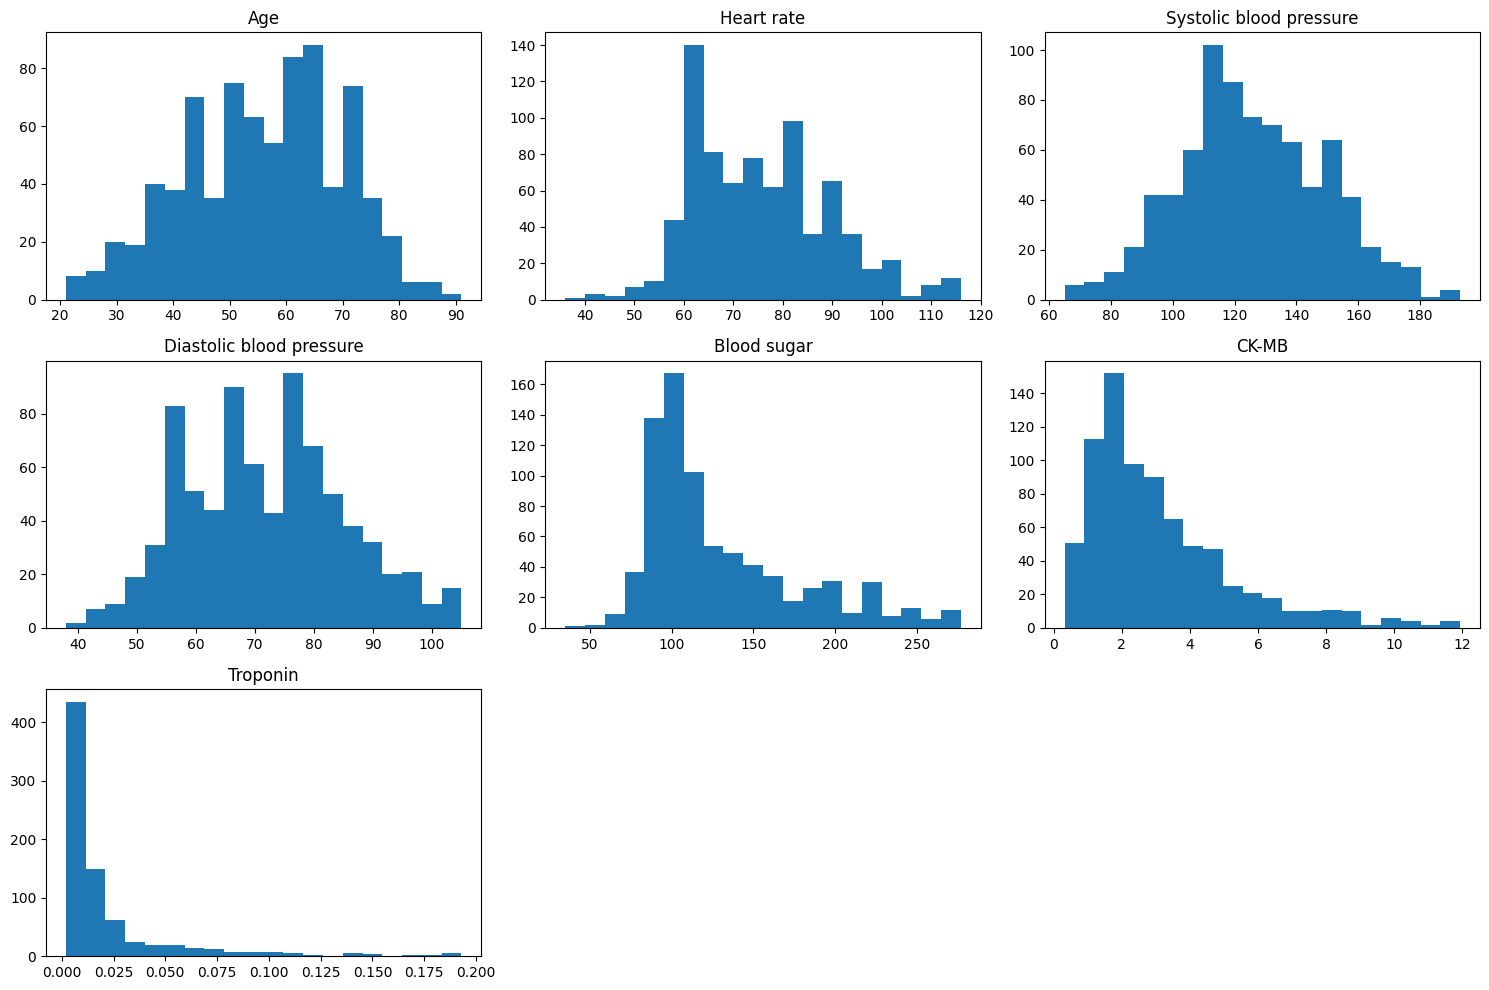

In [103]:
# Remove binary (one-hot) columns with only two unique values
numeric_cols = df.select_dtypes(include='number').columns
filtered_cols = [col for col in numeric_cols if df[col].nunique() > 2]

# Plot histograms only for relevant (non-binary) columns
df[filtered_cols].hist(bins=20, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

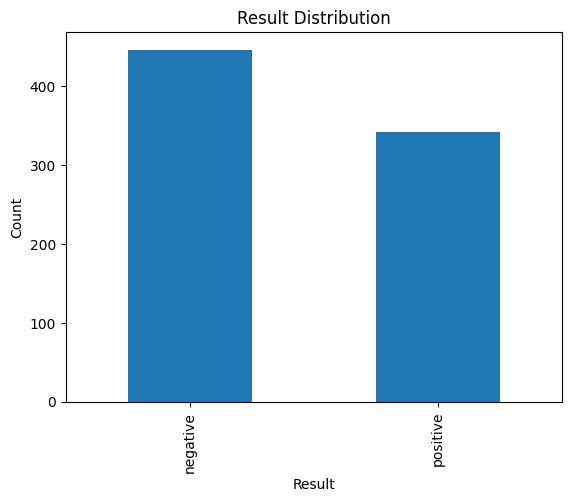

In [104]:
# Genskab kategorien "gender" fra one-hot
# gender_cols = [col for col in df.columns if col.startswith('gender_')]
# df['gender'] = df[gender_cols].idxmax(axis=1).str.replace('gender_', '')

# Samlet visualisering
df['Result'].value_counts().plot(kind='bar')
plt.title('Result Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.savefig("../outputs/graphs/result_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


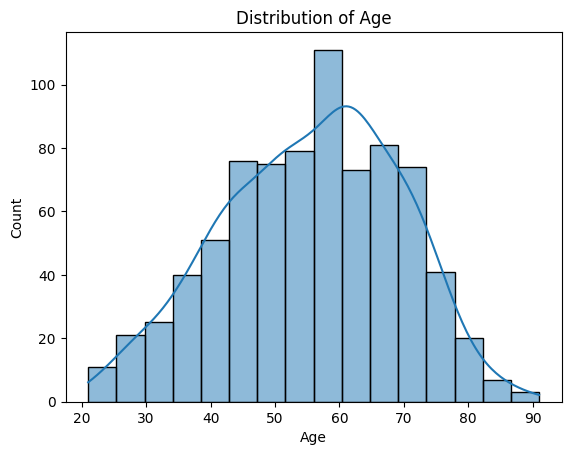

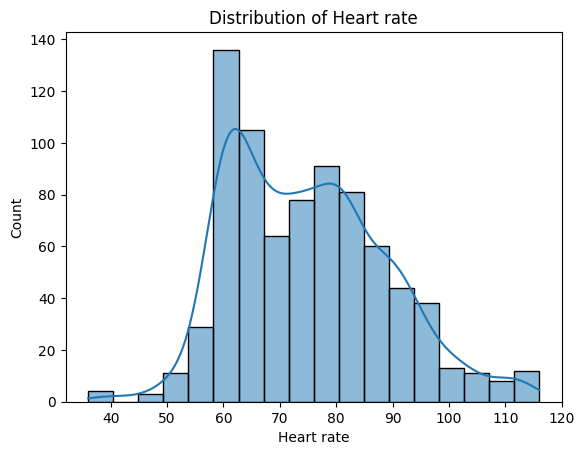

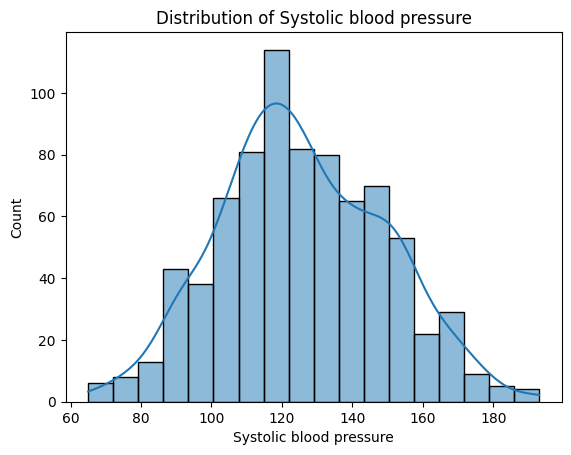

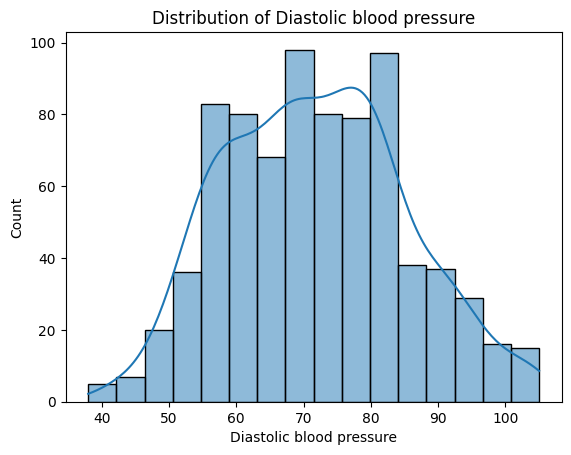

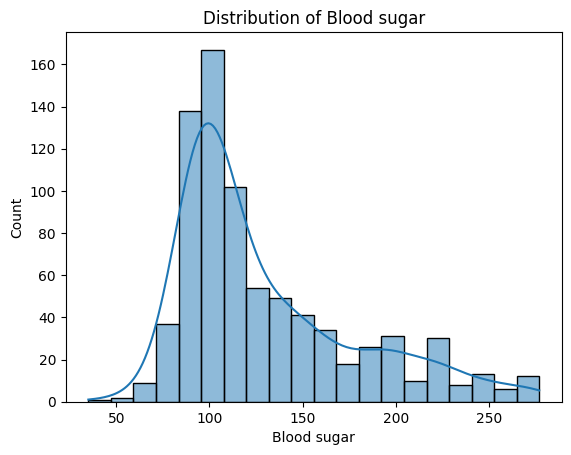

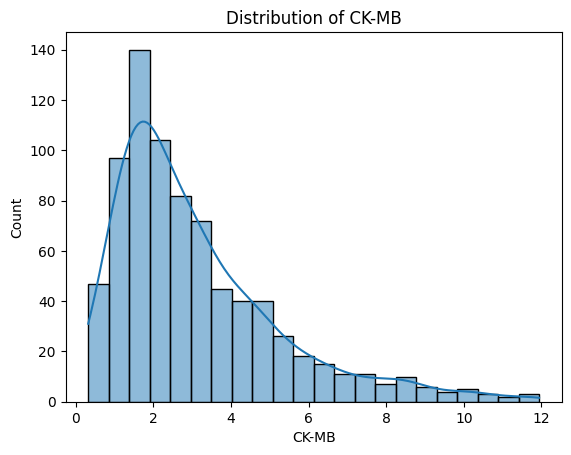

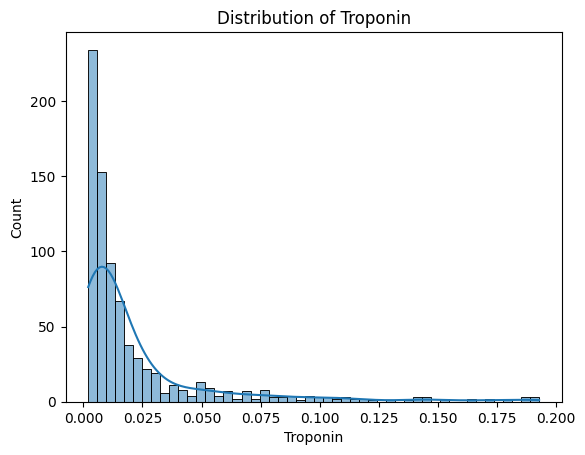

In [105]:
# Fjern binære one-hot kolonner med kun to unikke værdier
numeric_cols = df.select_dtypes(include='number').columns
filtered_cols = [col for col in numeric_cols if df[col].nunique() > 2]

for col in filtered_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

In [106]:
# Genskab 'gender' kolonne fra one-hot
# gender_cols = [col for col in df.columns if col.startswith('gender_')]
# df['gender'] = df[gender_cols].idxmax(axis=1).str.replace('gender_', '')


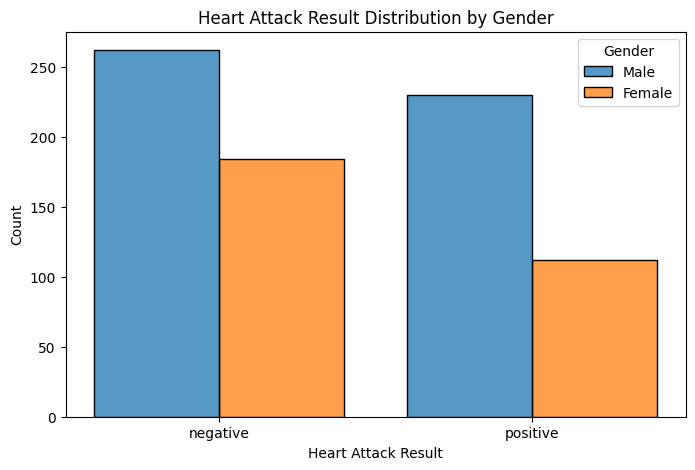

In [107]:
# Optional: Convert gender to label
df['Gender'] = df['Gender'].map({1: 'Male', 0: 'Female'})

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Result',
    hue='Gender',
    multiple='dodge',
    shrink=0.8,
    discrete=True
)
plt.title('Heart Attack Result Distribution by Gender')
plt.xlabel('Heart Attack Result')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

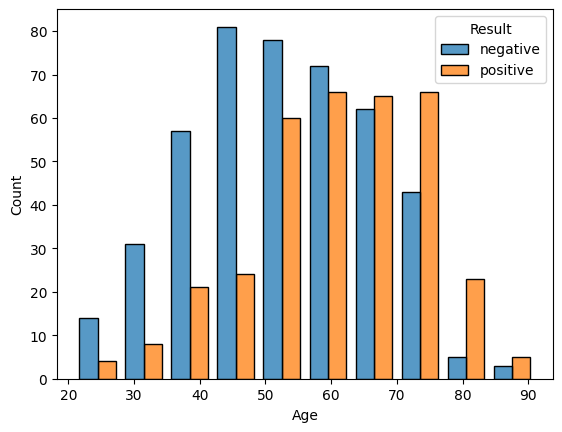

In [108]:
sns.histplot(
    data=df,
    x='Age',
    hue='Result',
    multiple='dodge',
    shrink=0.8,
    bins=10  # for a small sample, reduce bin count
)

In [109]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,Male,66,160,83,160.0,1.80,0.012,negative
1,55,Male,64,160,77,270.0,1.99,0.003,negative
2,58,Female,61,112,58,87.0,1.83,0.004,negative
3,32,Female,40,179,68,102.0,0.71,0.003,negative
4,44,Female,60,154,81,135.0,2.35,0.004,negative


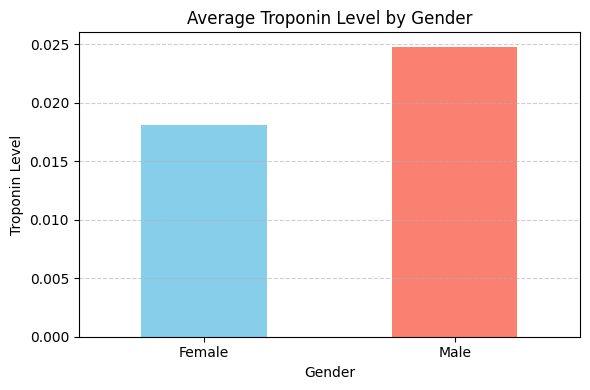

In [110]:
# Calculate average troponin level by gender
avg_troponin = df.groupby('Gender')['Troponin'].mean()

# Plot bar chart
plt.figure(figsize=(6, 4))
avg_troponin.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Troponin Level by Gender')
plt.ylabel('Troponin Level')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

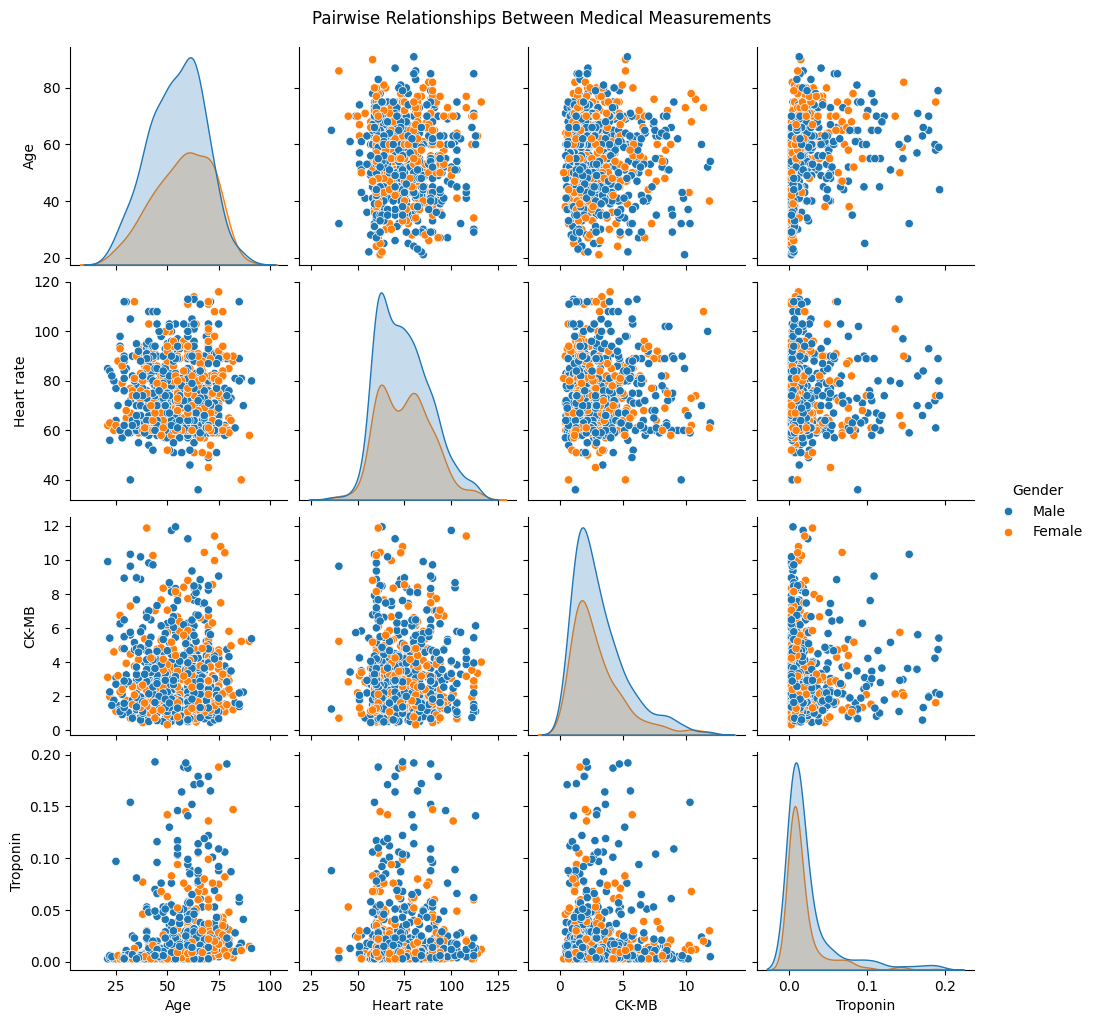

In [111]:
# Pairplot to show relationships between selected medical measurements
sns.pairplot(df, hue='Gender', vars=['Age', 'Heart rate', 'CK-MB', 'Troponin'])
plt.suptitle("Pairwise Relationships Between Medical Measurements", y=1.02)
plt.show()

##### Create a correlation matrix and a heat map of all data and investigate it.

In [112]:
df = pd.read_csv(dataset, header=0)

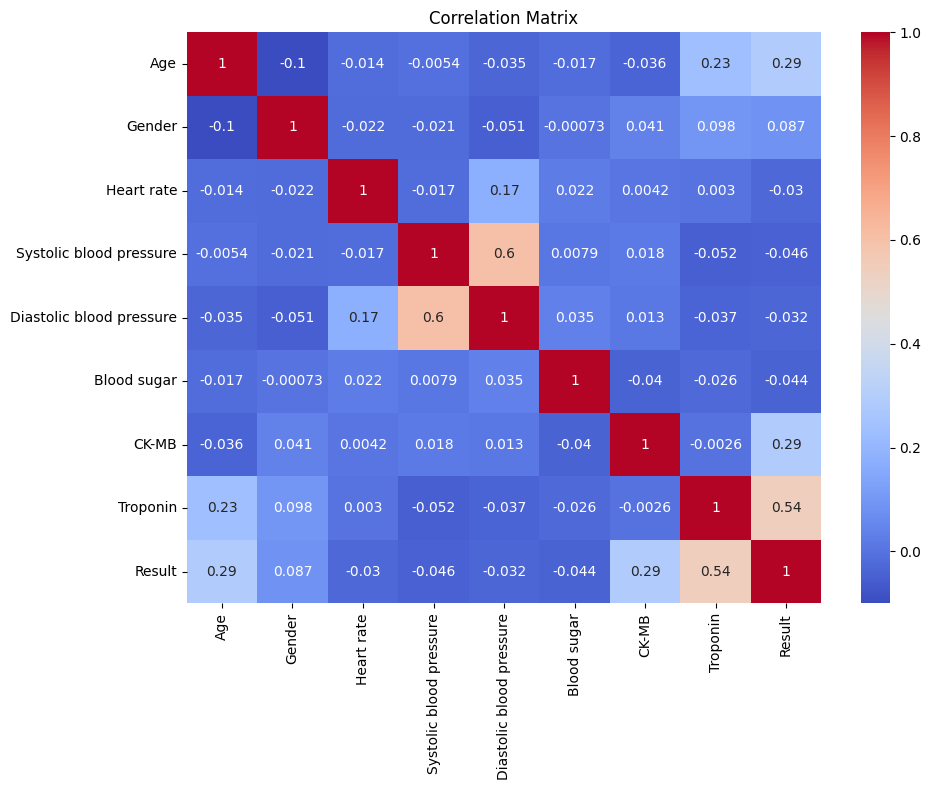

In [113]:
# Convert 'Result' column to numeric if it's still in string form
df['Result'] = df['Result'].map({'negative': 0, 'positive': 1})

# Calculate correlation matrix including 'Result'
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig("../outputs/graphs/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [114]:
# Round to 2 decimal places and display nicely
correlation_matrix = df.corr(numeric_only=True).round(2)
print("Correlation Matrix:\n")
print(correlation_matrix.to_string())


Correlation Matrix:

                           Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result
Age                       1.00   -0.10       -0.01                    -0.01                     -0.04        -0.02  -0.04      0.23    0.29
Gender                   -0.10    1.00       -0.02                    -0.02                     -0.05        -0.00   0.04      0.10    0.09
Heart rate               -0.01   -0.02        1.00                    -0.02                      0.17         0.02   0.00      0.00   -0.03
Systolic blood pressure  -0.01   -0.02       -0.02                     1.00                      0.60         0.01   0.02     -0.05   -0.05
Diastolic blood pressure -0.04   -0.05        0.17                     0.60                      1.00         0.03   0.01     -0.04   -0.03
Blood sugar              -0.02   -0.00        0.02                     0.01                      0.03         1.00  -0.04     -0.03   -0.04

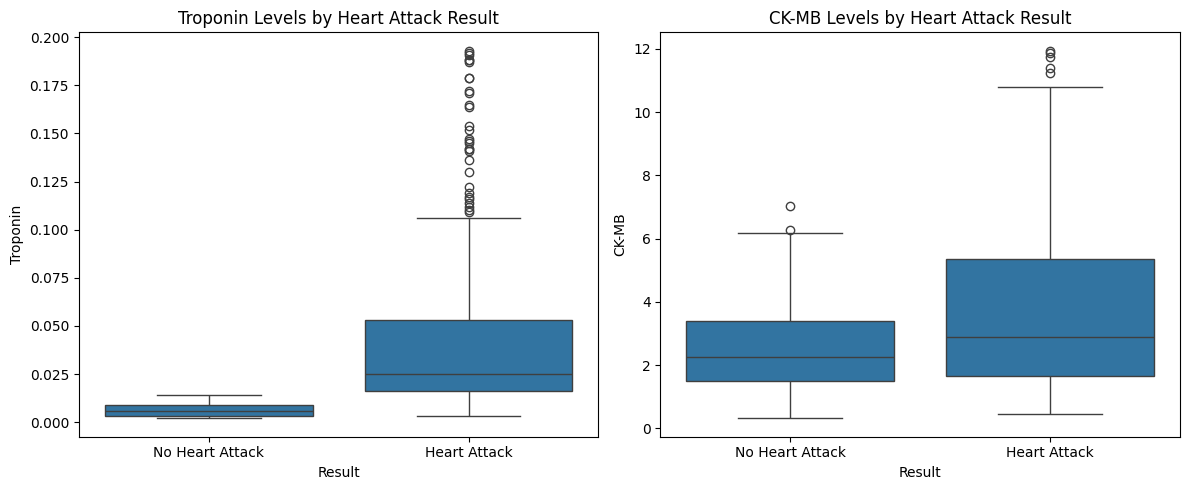

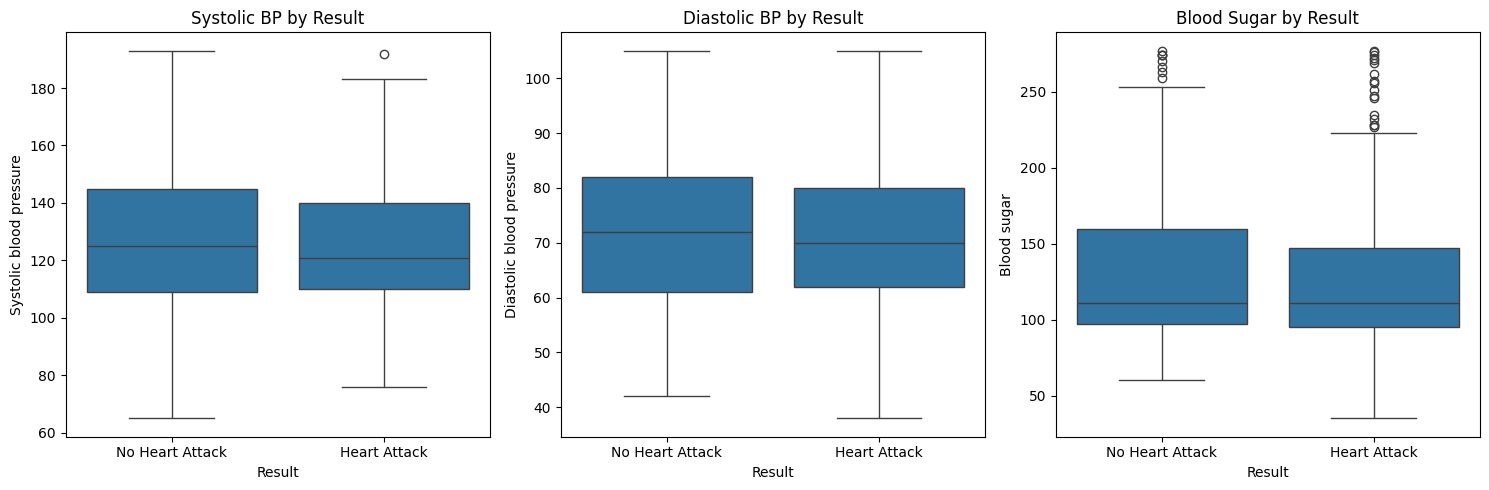

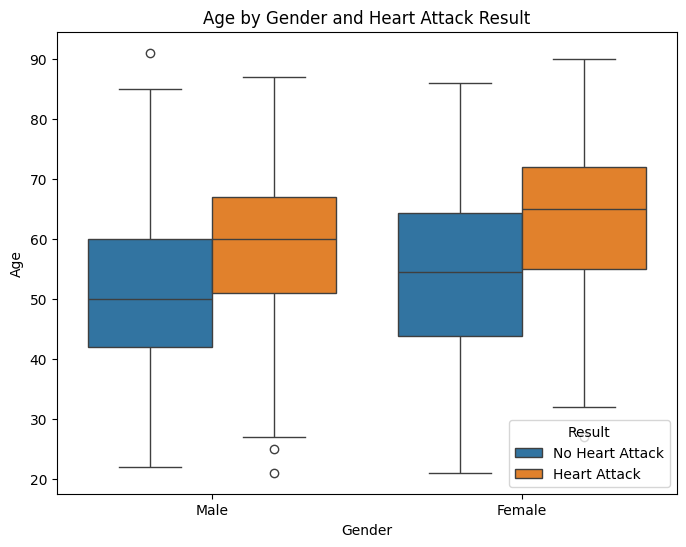

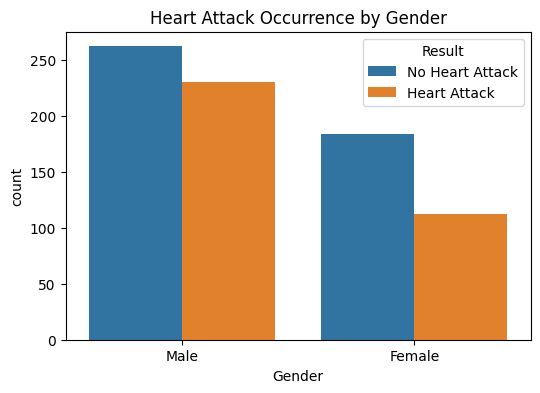

In [115]:
# Convert categorical values for readability
df['Gender'] = df['Gender'].map({0: 'Female', 1: 'Male'})
df['Result'] = df['Result'].map({0: 'No Heart Attack', 1: 'Heart Attack'})

# 1. Distribution of Troponin and CK-MB based on Result
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Result', y='Troponin')
plt.title('Troponin Levels by Heart Attack Result')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Result', y='CK-MB')
plt.title('CK-MB Levels by Heart Attack Result')

plt.tight_layout()
plt.show()

# 2. Blood Pressure and Blood Sugar by Result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='Result', y='Systolic blood pressure')
plt.title('Systolic BP by Result')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Result', y='Diastolic blood pressure')
plt.title('Diastolic BP by Result')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Result', y='Blood sugar')
plt.title('Blood Sugar by Result')

plt.tight_layout()
plt.show()

# 3. Age distribution by Gender and Result
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Age', hue='Result')
plt.title('Age by Gender and Heart Attack Result')
plt.show()

# 5. Heart attack rate by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Result')
plt.title('Heart Attack Occurrence by Gender')
plt.show()

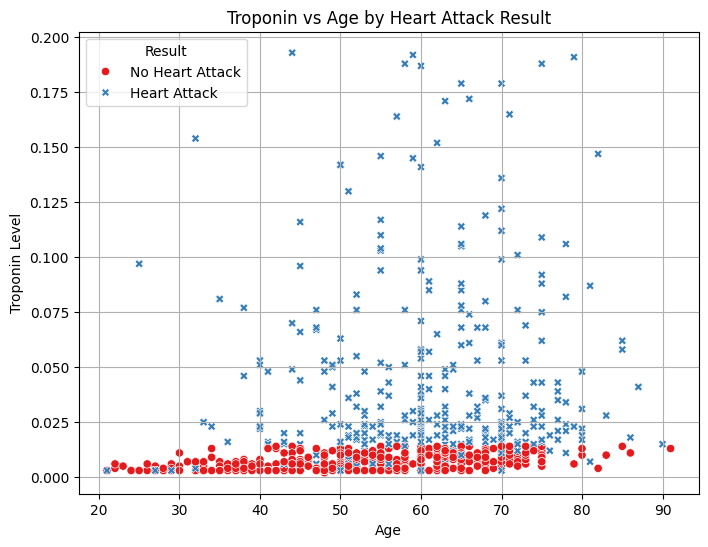

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Troponin', hue='Result', style='Result', palette='Set1')
plt.title('Troponin vs Age by Heart Attack Result')
plt.xlabel('Age')
plt.ylabel('Troponin Level')
plt.grid(True)
plt.show()


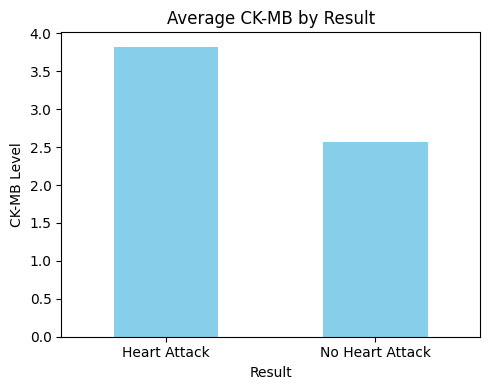

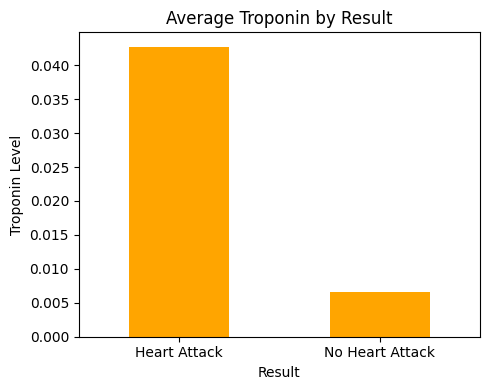

In [117]:
# CK-MB
df.groupby('Result')['CK-MB'].mean().plot(kind='bar', color='skyblue', figsize=(5, 4))
plt.title('Average CK-MB by Result')
plt.ylabel('CK-MB Level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Troponin
df.groupby('Result')['Troponin'].mean().plot(kind='bar', color='orange', figsize=(5, 4))
plt.title('Average Troponin by Result')
plt.ylabel('Troponin Level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
